# What are the most demanded skills for the 3 top most popular data roles?

## Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentager
4. Plot final findings

In [4]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/artbm01/Documents/Python-DataAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# filter for country
df_US = df[df['job_country'] == 'United States'].copy()

In [6]:
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
print(df_skills_count)
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count


job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

/var/folders/kk/05dcg5911v91lx6tv4f_gcdh0000gn/T/ipykernel_64164/2869837844.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_skills_count[df['job_title_short']==job_title].head(5)
/var/folders/kk/05dcg5911v91lx6tv4f_gcdh0000gn/T/ipykernel_64164/2869837844.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_skills_count[df['job_title_short']==job_title].head(5)
/var/folders/kk/05dcg5911v91lx6tv4f_gcdh0000gn/T/ipykernel_64164/2869837844.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_skills_count[df['job_title_short']==job_title].head(5)


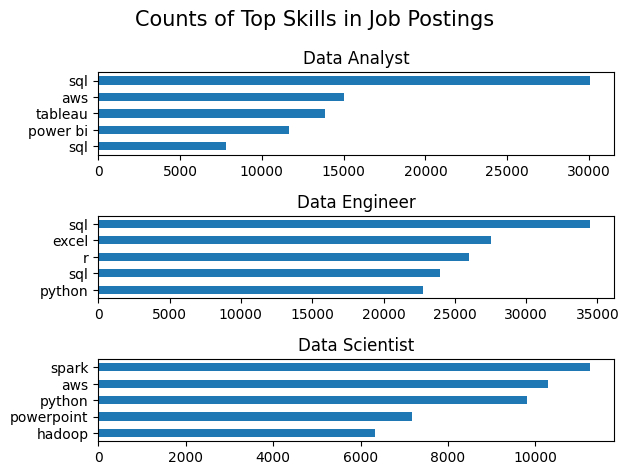

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()


In [9]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [10]:
df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count'] / df_skill_perc['jobs_total']
df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


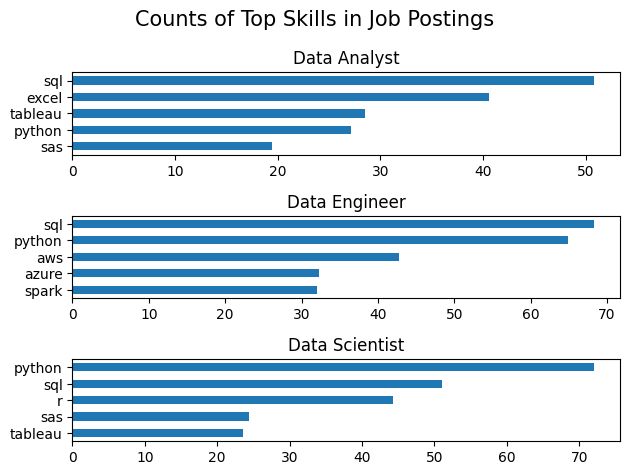

In [11]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()

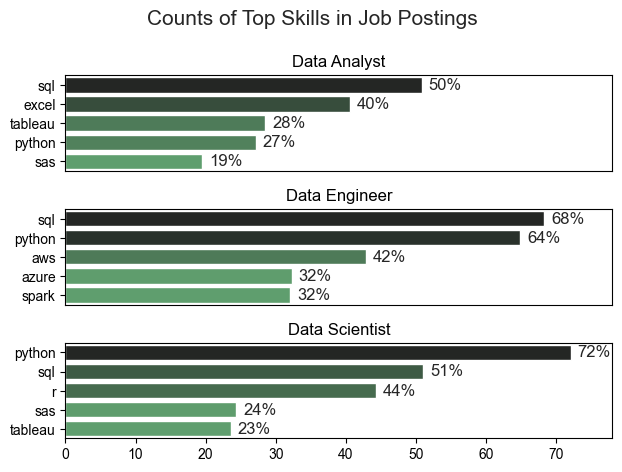

In [12]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, y='job_skills', x='skill_percent', ax=ax[i], hue='skill_count', palette='dark:g_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{int(v)}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()